In [1]:
import pandas as pd
import math
from collections import Counter
from medvqa.utils.constants import CHEXPERT_LABELS
import numpy as np
from IPython.display import Image

In [41]:
!ls /mnt/workspace/chexpert/CheXpert-v1.0-small/

groundtruth.csv  train	    train-val.csv	      valid	 val_labels.csv
test_labels.csv  train.csv  train_visualCheXbert.csv  valid.csv


In [2]:
df = pd.read_csv('/mnt/workspace/chexpert/CheXpert-v1.0-small/train-val.csv')

In [3]:
df

,Path,Sex,Age,Frontal/Lateral,AP/PA,No Finding,Enlarged Cardiomediastinum,Cardiomegaly,Lung Opacity,Lung Lesion,Edema,Consolidation,Pneumonia,Atelectasis,Pneumothorax,Pleural Effusion,Pleural Other,Fracture,Support Devices
0,CheXpert-v1.0-small/train/patient00001/study1/...,Female,68,Frontal,AP,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,1.0
1,CheXpert-v1.0-small/train/patient00002/study2/...,Female,87,Frontal,AP,NaN,NaN,-1.0,1.0,NaN,-1.0,-1.0,NaN,-1.0,NaN,-1.0,NaN,1.0,NaN
2,CheXpert-v1.0-small/train/patient00002/study1/...,Female,83,Frontal,AP,NaN,NaN,NaN,1.0,NaN,NaN,-1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN
3,CheXpert-v1.0-small/train/patient00002/study1/...,Female,83,Lateral,NaN,NaN,NaN,NaN,1.0,NaN,NaN,-1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN
4,CheXpert-v1.0-small/train/patient00003/study1/...,Male,41,Frontal,AP,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
223643,CheXpert-v1.0-small/valid/patient64736/study1/...,Female,57,Frontal,AP,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
223644,CheXpert-v1.0-small/valid/patient64737/study1/...,Male,65,Frontal,AP,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
223645,CheXpert-v1.0-small/valid/patient64738/study1/...,Male,71,Frontal,AP,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
223646,CheXpert-v1.0-small/valid/patient64739/study1/...,Female,45,Frontal,AP,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [80]:
df[df['Path'] == 'CheXpert-v1.0-small/train/patient42772/study1/view1_frontal.jpg']

,Path,Sex,Age,Frontal/Lateral,AP/PA,No Finding,Enlarged Cardiomediastinum,Cardiomegaly,Lung Opacity,Lung Lesion,Edema,Consolidation,Pneumonia,Atelectasis,Pneumothorax,Pleural Effusion,Pleural Other,Fracture,Support Devices
181593,CheXpert-v1.0-small/train/patient42772/study1/...,Male,52,Frontal,AP,NaN,NaN,NaN,1.0,NaN,NaN,-1.0,NaN,-1.0,NaN,NaN,NaN,NaN,NaN


In [4]:
Counter(df['Frontal/Lateral'])
# Counter(df['AP/PA'])

Counter({'Frontal': 191229, 'Lateral': 32419})

In [25]:
df_labels = df[CHEXPERT_LABELS]

In [31]:
labels = df_labels.fillna(0).to_numpy().astype(np.int8)
labels = np.where(labels == -1, 1, labels)

In [34]:
labels[0:10]

array([[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
       [0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0],
       [0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
       [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0]], dtype=int8)

In [54]:
row = df.iloc[-1]
def binary_label(x):
    if x == 1 or x == -1: return 1
    return 0
[row[x] for x in CHEXPERT_LABELS], \
np.array([binary_label(row[x]) for x in CHEXPERT_LABELS], dtype=np.int8)

([0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0],
 array([0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0], dtype=int8))

In [65]:
(df['Frontal/Lateral'] + df['AP/PA'].fillna(''))[5]

'FrontalPA'

In [40]:
Counter(df['Sex'])

Counter({'Female': 90883, 'Male': 132764, 'Unknown': 1})

In [45]:
import numpy as np

In [62]:
len(df), len(df[df['Sex'] != 'Unknown'])

(223648, 223647)

In [47]:
_x = np.arange(10)
np.random.shuffle(_x)
_x

array([4, 5, 8, 0, 3, 9, 6, 1, 7, 2])

In [58]:
('x' + df['Path']).to_numpy()

array(['xCheXpert-v1.0-small/train/patient00001/study1/view1_frontal.jpg',
       'xCheXpert-v1.0-small/train/patient00002/study2/view1_frontal.jpg',
       'xCheXpert-v1.0-small/train/patient00002/study1/view1_frontal.jpg',
       ...,
       'xCheXpert-v1.0-small/valid/patient64738/study1/view1_frontal.jpg',
       'xCheXpert-v1.0-small/valid/patient64739/study1/view1_frontal.jpg',
       'xCheXpert-v1.0-small/valid/patient64740/study1/view1_frontal.jpg'],
      dtype=object)

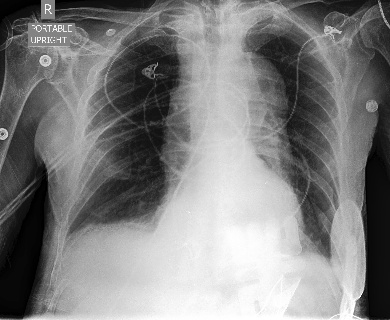

In [55]:
Image('/mnt/workspace/chexpert/' + row['Path'])

In [66]:
from medvqa.datasets.chexpert import (
    CHEXPERT_DATASET_DIR,
    CHEXPERT_CACHE_DIR,
    CHEXPERT_TRAIN_VAL_CSV_PATH,
)

In [70]:
df = pd.read_csv(CHEXPERT_TRAIN_VAL_CSV_PATH)
df_orien = df['Frontal/Lateral'] + df['AP/PA'].fillna('')
df_gender = df['Sex']
df_labels = df[CHEXPERT_LABELS]        
valid_rows = (df_orien != 'FrontalLL') & (df_orien != 'FrontalRL') & (df_gender != 'Unknown')

df_orien = df_orien[valid_rows].re
df_gender = df_gender[valid_rows]
df_labels = df_labels[valid_rows]
df_paths = df['Path'][valid_rows]

In [77]:
len(df_orien), len(df_orien.to_numpy())

(223630, 223630)

In [68]:
df_gender != 'Unknown'

0         True
1         True
2         True
3         True
4         True
          ... 
223643    True
223644    True
223645    True
223646    True
223647    True
Name: Sex, Length: 223648, dtype: bool

In [8]:
df_val_labels = pd.read_csv('/mnt/workspace/chexpert/CheXpert-v1.0-small/val_labels.csv')

In [9]:
df_val_labels

,Path,Sex,Age,Frontal/Lateral,AP/PA,No Finding,Enlarged Cardiomediastinum,Cardiomegaly,Lung Opacity,Lung Lesion,Edema,Consolidation,Pneumonia,Atelectasis,Pneumothorax,Pleural Effusion,Pleural Other,Fracture,Support Devices
0,CheXpert-v1.0/valid/patient64541/study1/view1_...,Male,73,Frontal,AP,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,CheXpert-v1.0/valid/patient64542/study1/view1_...,Male,70,Frontal,PA,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,CheXpert-v1.0/valid/patient64542/study1/view2_...,Male,70,Lateral,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,CheXpert-v1.0/valid/patient64543/study1/view1_...,Male,85,Frontal,AP,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,CheXpert-v1.0/valid/patient64544/study1/view1_...,Female,42,Frontal,AP,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
229,CheXpert-v1.0/valid/patient64736/study1/view1_...,Female,57,Frontal,AP,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
230,CheXpert-v1.0/valid/patient64737/study1/view1_...,Male,65,Frontal,AP,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
231,CheXpert-v1.0/valid/patient64738/study1/view1_...,Male,71,Frontal,AP,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
232,CheXpert-v1.0/valid/patient64739/study1/view1_...,Female,45,Frontal,AP,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [10]:
df_test_labels = pd.read_csv('/mnt/workspace/chexpert/CheXpert-v1.0-small/test_labels.csv')

In [11]:
df_test_labels

,Path,No Finding,Enlarged Cardiomediastinum,Cardiomegaly,Lung Opacity,Lung Lesion,Edema,Consolidation,Pneumonia,Atelectasis,Pneumothorax,Pleural Effusion,Pleural Other,Fracture,Support Devices
0,test/patient64741/study1/view1_frontal.jpg,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,test/patient64742/study1/view1_frontal.jpg,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,test/patient64743/study1/view1_frontal.jpg,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,test/patient64744/study1/view1_frontal.jpg,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,test/patient64744/study1/view2_lateral.jpg,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
663,test/patient65236/study1/view1_frontal.jpg,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
664,test/patient65237/study1/view1_frontal.jpg,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
665,test/patient65238/study1/view1_frontal.jpg,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
666,test/patient65239/study1/view1_frontal.jpg,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


In [12]:
len(df_val_labels) + len(df_test_labels)

902

In [14]:
df_valid = pd.read_csv('/mnt/workspace/chexpert/CheXpert-v1.0-small/valid.csv')

In [15]:
df_valid

,Path,Sex,Age,Frontal/Lateral,AP/PA,No Finding,Enlarged Cardiomediastinum,Cardiomegaly,Lung Opacity,Lung Lesion,Edema,Consolidation,Pneumonia,Atelectasis,Pneumothorax,Pleural Effusion,Pleural Other,Fracture,Support Devices
0,CheXpert-v1.0-small/valid/patient64541/study1/...,Male,73,Frontal,AP,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,CheXpert-v1.0-small/valid/patient64542/study1/...,Male,70,Frontal,PA,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,CheXpert-v1.0-small/valid/patient64542/study1/...,Male,70,Lateral,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,CheXpert-v1.0-small/valid/patient64543/study1/...,Male,85,Frontal,AP,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,CheXpert-v1.0-small/valid/patient64544/study1/...,Female,42,Frontal,AP,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
229,CheXpert-v1.0-small/valid/patient64736/study1/...,Female,57,Frontal,AP,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
230,CheXpert-v1.0-small/valid/patient64737/study1/...,Male,65,Frontal,AP,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
231,CheXpert-v1.0-small/valid/patient64738/study1/...,Male,71,Frontal,AP,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
232,CheXpert-v1.0-small/valid/patient64739/study1/...,Female,45,Frontal,AP,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [16]:
df_train = pd.read_csv('/mnt/workspace/chexpert/CheXpert-v1.0-small/train.csv')

In [17]:
df_train

,Path,Sex,Age,Frontal/Lateral,AP/PA,No Finding,Enlarged Cardiomediastinum,Cardiomegaly,Lung Opacity,Lung Lesion,Edema,Consolidation,Pneumonia,Atelectasis,Pneumothorax,Pleural Effusion,Pleural Other,Fracture,Support Devices
0,CheXpert-v1.0-small/train/patient00001/study1/...,Female,68,Frontal,AP,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,1.0
1,CheXpert-v1.0-small/train/patient00002/study2/...,Female,87,Frontal,AP,NaN,NaN,-1.0,1.0,NaN,-1.0,-1.0,NaN,-1.0,NaN,-1.0,NaN,1.0,NaN
2,CheXpert-v1.0-small/train/patient00002/study1/...,Female,83,Frontal,AP,NaN,NaN,NaN,1.0,NaN,NaN,-1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN
3,CheXpert-v1.0-small/train/patient00002/study1/...,Female,83,Lateral,NaN,NaN,NaN,NaN,1.0,NaN,NaN,-1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN
4,CheXpert-v1.0-small/train/patient00003/study1/...,Male,41,Frontal,AP,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
223409,CheXpert-v1.0-small/train/patient64537/study2/...,Male,59,Frontal,AP,NaN,NaN,NaN,-1.0,NaN,NaN,NaN,NaN,-1.0,0.0,1.0,NaN,NaN,NaN
223410,CheXpert-v1.0-small/train/patient64537/study1/...,Male,59,Frontal,AP,NaN,NaN,NaN,-1.0,NaN,NaN,NaN,0.0,-1.0,NaN,-1.0,NaN,NaN,NaN
223411,CheXpert-v1.0-small/train/patient64538/study1/...,Female,0,Frontal,AP,NaN,NaN,NaN,NaN,NaN,-1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
223412,CheXpert-v1.0-small/train/patient64539/study1/...,Female,0,Frontal,AP,NaN,NaN,1.0,1.0,NaN,NaN,NaN,-1.0,1.0,0.0,NaN,NaN,NaN,0.0


In [18]:
df_gt = pd.read_csv('/mnt/workspace/chexpert/CheXpert-v1.0-small/groundtruth.csv')

In [19]:
df_gt

,Study,No Finding,Enlarged Cardiomediastinum,Cardiomegaly,Lung Opacity,Lung Lesion,Edema,Consolidation,Pneumonia,Atelectasis,Pneumothorax,Pleural Effusion,Pleural Other,Fracture,Support Devices
0,CheXpert-v1.0/test/patient64741/study1,0,1,1,1,0,0,0,0,0,0,0,0,0,1
1,CheXpert-v1.0/test/patient64742/study1,0,1,0,1,0,0,0,0,1,0,0,0,0,0
2,CheXpert-v1.0/test/patient64743/study1,0,1,1,1,0,1,0,0,1,0,0,0,0,0
3,CheXpert-v1.0/test/patient64744/study1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,CheXpert-v1.0/test/patient64745/study1,0,1,1,1,1,0,0,0,1,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,CheXpert-v1.0/test/patient65236/study1,0,1,1,1,0,1,0,0,0,0,0,0,0,1
496,CheXpert-v1.0/test/patient65237/study1,0,1,0,0,0,0,0,0,0,0,0,0,0,0
497,CheXpert-v1.0/test/patient65238/study1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
498,CheXpert-v1.0/test/patient65239/study1,0,1,1,1,0,1,0,0,1,0,0,0,0,1


In [33]:
import os
test_study2labels = {}
labels = df_test_labels[CHEXPERT_LABELS].values
for i, x in enumerate(df_test_labels['Path']):
    test_study2labels[os.path.dirname(x)[5:]] = labels[i]
    
# aux = set(os.path.dirname(x)[5:] for x in df_test_labels['Path'])

In [34]:
len(test_study2labels)

500

In [35]:
len("CheXpert-v1.0/test/")

19

In [36]:
gt_study2labels = {}
labels = df_gt[CHEXPERT_LABELS].values
for i, x in enumerate(df_gt['Study']):
    gt_study2labels[x[19:]] = labels[i]

In [37]:
len(gt_study2labels)

500

In [39]:
assert set(test_study2labels.keys()) == set(gt_study2labels.keys())

In [40]:
for k in test_study2labels:
    assert np.array_equal(test_study2labels[k], gt_study2labels[k])

In [43]:
df_visualchexbert_train = pd.read_csv('/mnt/workspace/chexpert/CheXpert-v1.0-small/train_visualCheXbert.csv')

In [44]:
df_visualchexbert_train

,Path,Sex,Age,Frontal/Lateral,AP/PA,Enlarged Cardiomediastinum,Cardiomegaly,Lung Opacity,Lung Lesion,Edema,Consolidation,Pneumonia,Atelectasis,Pneumothorax,Pleural Effusion,Pleural Other,Fracture,Support Devices,No Finding
0,CheXpert-v1.0/train/patient00001/study1/view1_...,Female,68,Frontal,AP,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,CheXpert-v1.0/train/patient00002/study2/view1_...,Female,87,Frontal,AP,1.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
2,CheXpert-v1.0/train/patient00002/study1/view1_...,Female,83,Frontal,AP,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0
3,CheXpert-v1.0/train/patient00002/study1/view2_...,Female,83,Lateral,NaN,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0
4,CheXpert-v1.0/train/patient00003/study1/view1_...,Male,41,Frontal,AP,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
223409,CheXpert-v1.0/train/patient64537/study2/view1_...,Male,59,Frontal,AP,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0
223410,CheXpert-v1.0/train/patient64537/study1/view1_...,Male,59,Frontal,AP,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0
223411,CheXpert-v1.0/train/patient64538/study1/view1_...,Female,0,Frontal,AP,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
223412,CheXpert-v1.0/train/patient64539/study1/view1_...,Female,0,Frontal,AP,1.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [45]:
df_train[CHEXPERT_LABELS].values

array([[ 1., nan, nan, ..., nan, nan,  1.],
       [nan, nan, -1., ..., nan,  1., nan],
       [nan, nan, nan, ..., nan,  1., nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan,  1., ..., nan, nan,  0.],
       [ 1., nan, nan, ..., nan, nan, nan]])

In [47]:
tmp = df_train[CHEXPERT_LABELS].fillna(0).values
tmp = np.where(tmp == -1, 1, tmp)
tmp

array([[1., 0., 0., ..., 0., 0., 1.],
       [0., 0., 1., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.]])

In [48]:
tmp2 = df_visualchexbert_train[CHEXPERT_LABELS].values

In [49]:
tmp2

array([[0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 1., 1., 0.],
       ...,
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [51]:
(tmp == tmp2).mean() # agreement between original labels and visual chexbert labels

0.7422769899315684

In [69]:
df_visualchexbert_train.columns

Index(['Path', 'Sex', 'Age', 'Frontal/Lateral', 'AP/PA',
       'Enlarged Cardiomediastinum', 'Cardiomegaly', 'Lung Opacity',
       'Lung Lesion', 'Edema', 'Consolidation', 'Pneumonia', 'Atelectasis',
       'Pneumothorax', 'Pleural Effusion', 'Pleural Other', 'Fracture',
       'Support Devices', 'No Finding'],
      dtype='object')

In [70]:
df_valid.columns

Index(['Path', 'Sex', 'Age', 'Frontal/Lateral', 'AP/PA', 'No Finding',
       'Enlarged Cardiomediastinum', 'Cardiomegaly', 'Lung Opacity',
       'Lung Lesion', 'Edema', 'Consolidation', 'Pneumonia', 'Atelectasis',
       'Pneumothorax', 'Pleural Effusion', 'Pleural Other', 'Fracture',
       'Support Devices'],
      dtype='object')

In [72]:
set(df_visualchexbert_train.columns) == set(df_valid.columns)

True

In [54]:
df_merged = pd.concat([df_visualchexbert_train, df_valid], ignore_index=True)

In [55]:
df_merged

,Path,Sex,Age,Frontal/Lateral,AP/PA,Enlarged Cardiomediastinum,Cardiomegaly,Lung Opacity,Lung Lesion,Edema,Consolidation,Pneumonia,Atelectasis,Pneumothorax,Pleural Effusion,Pleural Other,Fracture,Support Devices,No Finding
0,CheXpert-v1.0/train/patient00001/study1/view1_...,Female,68,Frontal,AP,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,CheXpert-v1.0/train/patient00002/study2/view1_...,Female,87,Frontal,AP,1.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
2,CheXpert-v1.0/train/patient00002/study1/view1_...,Female,83,Frontal,AP,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0
3,CheXpert-v1.0/train/patient00002/study1/view2_...,Female,83,Lateral,NaN,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0
4,CheXpert-v1.0/train/patient00003/study1/view1_...,Male,41,Frontal,AP,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
223643,CheXpert-v1.0-small/valid/patient64736/study1/...,Female,57,Frontal,AP,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
223644,CheXpert-v1.0-small/valid/patient64737/study1/...,Male,65,Frontal,AP,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
223645,CheXpert-v1.0-small/valid/patient64738/study1/...,Male,71,Frontal,AP,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
223646,CheXpert-v1.0-small/valid/patient64739/study1/...,Female,45,Frontal,AP,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [56]:
df_visualchexbert_train.iloc[0]

Path                          CheXpert-v1.0/train/patient00001/study1/view1_...
Sex                                                                      Female
Age                                                                          68
Frontal/Lateral                                                         Frontal
AP/PA                                                                        AP
Enlarged Cardiomediastinum                                                  0.0
Cardiomegaly                                                                0.0
Lung Opacity                                                                0.0
Lung Lesion                                                                 0.0
Edema                                                                       0.0
Consolidation                                                               0.0
Pneumonia                                                                   0.0
Atelectasis                             

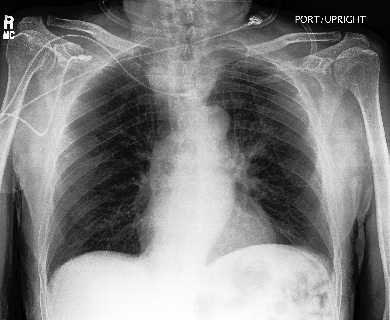

In [66]:
Image('/mnt/workspace/chexpert/' + df_visualchexbert_train.iloc[-15]['Path'].replace('CheXpert-v1.0', 'CheXpert-v1.0-small'))